# Keras卷积神经网络识别CIFAR-10图像

## 1 卷积神经网络介绍

输入层：图像大小为32x32

第1次卷积运算：输入的数字图像大小为32x32，使用随机产生的3x3过滤器进行卷积运算，卷积运算并不会改变图像大小，处理后的图像大小仍然是32x32。总共会随机产生32个过滤器，也就是说会产生32个图像，每个图像提取不同的特征。

第1次缩减采样（池化）：使用Max-Pool缩减采样，将32个32x32的图像缩小为32个16x16的图像，但是图像的数量仍为32个

第2次卷积运算：将原本32个图像转换为64个图像，卷积运算不会改变图像大小，仍为16x16

第2次缩减采样（池化）：将64个16x16的图像缩小为64个8x8的图像

平坦层：将64个8x8的图像以reshape转换为一维向量，长度为64x8x8=4096,也就是4096个float数，作为神经元的输入

隐藏层：共1024个神经元

输出层：共有10个神经元，对应0~9个图像

建立CNN模型的步骤与建立MLP类似

## 2 数据预处理

### 2.1 导入所需模块

In [1]:
from keras.datasets import cifar10
import numpy as np
np.random.seed(10)

D:\Python\envs\tensorFlow\lib\site-packages\h5py\__init__.py:34: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


### 2.2 读取CIFAR-10数据

In [2]:
(x_img_train,y_label_train),(x_img_test,y_label_test)=cifar10.load_data()

### 2.3 显示训练与验证数据的shape

In [3]:
print("train data:",'images:',x_img_train.shape,"labels:",y_label_train.shape)
print("test data:",'images:',x_img_test.shape,"labels:",y_label_test.shape)

train data: images: (50000, 32, 32, 3) labels: (50000, 1)
test data: images: (10000, 32, 32, 3) labels: (10000, 1)


### 2.4 将照片图像特征值标准化

将features（照片图像特征值）标准化可以提高模型预测的准确率，并且更快收敛。

In [4]:
x_img_train_normalize=x_img_train.astype('float32')/255.0
x_img_test_normalize=x_img_test.astype('float32')/255.0

### 2.5 以一位有效编码进行转换

In [5]:
from keras.utils import np_utils
y_lable_train_OneHot=np_utils.to_categorical(y_label_train)
y_label_test_OneGot=np_utils.to_categorical(y_label_test)

## 3 建立模型

### 3.1 导入模块

In [6]:
from keras.models import Sequential
from keras.layers import Dense,Dropout,Activation,Flatten
from keras.layers import Conv2D,MaxPool2D,ZeroPadding2D

### 3.2 建立keras的Sequential()模型

In [7]:
model=Sequential()

### 3.3 建立卷积层1与池化层1

In [8]:
model.add(Conv2D(filters=32,kernel_size=(3,3),
                input_shape=(32,32,3),
                activation='relu',
                padding='same'))
model.add(Dropout(rate=0.25))
model.add(MaxPool2D(pool_size=(2,2))) 

### 3.4 建立卷积层2与池化层2

In [9]:
model.add(Conv2D(filters=64,kernel_size=(3,3),
                activation='relu',padding='same'))
model.add(Dropout(rate=0.25))
model.add(MaxPool2D(pool_size=(2,2))) 

### 3.5 建立神经网络（平坦层、隐藏层、输出层）

In [10]:
#建立平坦层
model.add(Flatten())
model.add(Dropout(rate=0.25))

In [11]:
#建立隐藏层
model.add(Dense(1024,activation='relu'))
model.add(Dropout(rate=0.25))

In [12]:
#建立输出层
model.add(Dense(10,activation='softmax'))

### 3.6 查看模型摘要

In [13]:
print(model.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 32, 32, 32)        896       
_________________________________________________________________
dropout_1 (Dropout)          (None, 32, 32, 32)        0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 16, 16, 64)        18496     
_________________________________________________________________
dropout_2 (Dropout)          (None, 16, 16, 64)        0         
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 8, 8, 64)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 4096)              0         
__________

## 4 进行训练

### 4.1 定义训练方式

In [14]:
model.compile(loss='categorical_crossentropy',  #设置损失函数，在深度学习中使用cross_entropy(交叉熵)训练的效果比较好。
              optimizer='adam',         #设置训练时，在深度学习中使用adam优化器可以让训练更快收敛，并提高准确率。
              metrics=['accuracy'])    #设置评估模型的方式是准确率

### 4.2 开始训练

In [15]:
train_history=model.fit(x_img_train_normalize,y_lable_train_OneHot,
                       validation_split=0.2,
                       epochs=10,batch_size=128,verbose=1)

Train on 40000 samples, validate on 10000 samples
Epoch 1/10
40000/40000 [==============================] - 161s 4ms/step - loss: 1.5015 - acc: 0.4599 - val_loss: 1.2867 - val_acc: 0.5807
Epoch 2/10
40000/40000 [==============================] - 163s 4ms/step - loss: 1.1363 - acc: 0.5958 - val_loss: 1.1255 - val_acc: 0.6310
Epoch 3/10
40000/40000 [==============================] - 158s 4ms/step - loss: 0.9832 - acc: 0.6540 - val_loss: 1.0206 - val_acc: 0.6587
Epoch 4/10
40000/40000 [==============================] - 160s 4ms/step - loss: 0.8734 - acc: 0.6912 - val_loss: 0.9498 - val_acc: 0.6911
Epoch 5/10
40000/40000 [==============================] - 183s 5ms/step - loss: 0.7851 - acc: 0.7239 - val_loss: 0.8781 - val_acc: 0.7052
Epoch 6/10
40000/40000 [==============================] - 183s 5ms/step - loss: 0.6976 - acc: 0.7534 - val_loss: 0.8363 - val_acc: 0.7193
Epoch 7/10
40000/40000 [==============================] - 177s 4ms/step - loss: 0.6180 - acc: 0.7830 - val_loss: 0.8146 - 

In [16]:
model.save("SaveModel/cifarCnnModel.h10")
print("Save model to disk")

Save model to disk


### 4.3 画出准确率结果

In [17]:
import matplotlib.pyplot as plt
def show_train_history(train_history,train,validation):   #train表示训练数据的执行结果，validation表示验证数据的执行结果
    plt.plot(train_history.history[train])
    plt.plot(train_history.history[validation])
    plt.title('Train History')                 #显示图的标题
    plt.ylabel(train)                          #显示y轴的标签
    plt.xlabel('Epoch')                        #设置x轴的标签为‘Epoch’       
    plt.legend(['train','validation'],loc='upper left')     #设置图例是显示‘train’与‘validation’，位置在左上角
    plt.show()

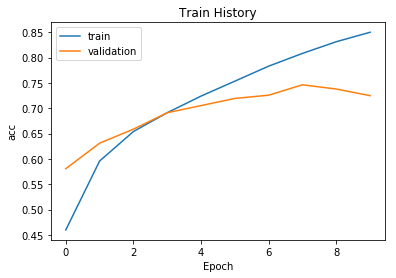

In [18]:
show_train_history(train_history,'acc','val_acc')

### 4.4 画出误差的执行结果

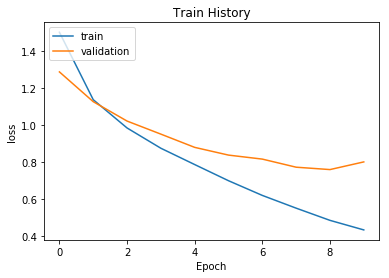

In [19]:
show_train_history(train_history,'loss','val_loss')

## 5 评估模型的准确率

In [20]:
scores = model.evaluate(x_img_test_normalize,
                       y_label_test_OneGot,verbose=0)
scores[1]

0.7216

## 6 进行预测

### 6.1 执行预测

In [21]:
prediction=model.predict_classes(x_img_test_normalize)

### 6.2 预测结果

In [22]:
prediction[:10]

array([3, 8, 8, 0, 6, 6, 1, 6, 3, 1], dtype=int64)

### 6.3 显示前10项预测结果

In [23]:
import matplotlib.pyplot as plt
#共10个分类：飞机，汽车，鸟，猫，鹿，狗，青蛙，马，船，卡车。
label_dict={0:"airplane",1:"automobile",2:"bird",3:"cat",4:"deer",5:"dog",6:"frog",7:"horse",8:"ship",9:"truck"}
def plot_images_labels_prediction(images,labels,prediction,idx,num=10):
    fig=plt.gcf()
    fig.set_size_inches(12,14)
    if num>25:
        num=25
    for i in range(0,num):
        ax=plt.subplot(5,5,1+i)
        ax.imshow(images[idx],cmap='binary')
        title = str(i)+','+label_dict[labels[i][0]]
        if len(prediction)>0:
            title+='=>'+label_dict[prediction[i]]
        ax.set_title(title,fontsize=10)
        ax.set_xticks([]);ax.set_yticks([])
        idx+=1
    plt.show()

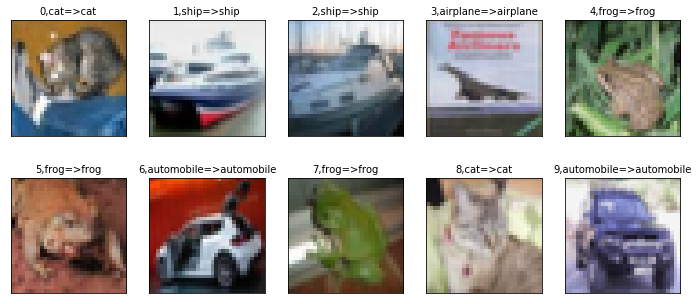

In [24]:
plot_images_labels_prediction(x_img_test,y_label_test,prediction,0,10)

## 7 查看预测概率

### 7.1 使用测试数据进行预测

In [25]:
Predicted_Probability=model.predict(x_img_test_normalize)

### 7.2 建立显示预测概率的函数

In [26]:
#传入的参数：y(真实值)、prediction(预测结果)、x_img(预测的图像)、Predicted_Probability(预测概率)、i(开始显示的数据index)
def show_Predicted_Probability(y,prediction,x_img,Predicted_Probability,i):
    
    print('lable:',label_dict[y[i][0]],                       #显示真实值与预测结果
          'predict',label_dict[prediction[i]])
    
    plt.figure(figsize=(2,2))                             #设置显示图像的大小，并且显示出照片图像
    plt.imshow(np.reshape(x_img_test[i],(32,32,3)))
    plt.show()
    
    for j in range(10):               #使用for循环读取Prediction_Probability显示预测概率
        print(label_dict[j]+
             ' Probability:%1.9f'%(Predicted_Probability[i][j]))

### 7.3 显示数据预测的概率

lable: cat predict cat


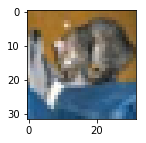

airplane Probability:0.000711507
automobile Probability:0.000709174
bird Probability:0.004650989
cat Probability:0.697963476
deer Probability:0.004086797
dog Probability:0.256247520
frog Probability:0.024923997
horse Probability:0.001921225
ship Probability:0.008449926
truck Probability:0.000335309


In [27]:
show_Predicted_Probability(y_label_test,prediction,
                          x_img_test,Predicted_Probability,0)

lable: airplane predict airplane


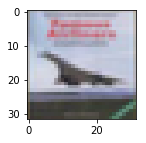

airplane Probability:0.767244220
automobile Probability:0.001236893
bird Probability:0.027084334
cat Probability:0.000962198
deer Probability:0.001804781
dog Probability:0.000023256
frog Probability:0.000049170
horse Probability:0.000036990
ship Probability:0.201146275
truck Probability:0.000411976


In [28]:
show_Predicted_Probability(y_label_test,prediction,x_img_test,Predicted_Probability,3)

## 8 显示混淆矩阵

想知道所建立的模型中哪些图像类别的预测准确率最高，哪些图像类别最容易混淆（预测错误），就可以使用混淆矩阵来显示。

### 8.1 查看预测结果的形状

我们将使用pd.crosstab建立混淆矩阵，但是pd.crosstab的输入都必须是一维数组，所以要先确认prediction(预测结果)与y_label_test（真实值）是一维数组。如果不是，必须先转为一维数组。

In [29]:
prediction.shape

(10000,)

### 8.2 查看y_label_test真实值的shape形状

In [30]:
y_label_test.shape

(10000, 1)

由以上结果可知，y_label_test真实值的shape形状是二维数组，必须将其转换为二维数组。

### 8.3 将y_label_test真实值转换为一维数组

In [31]:
y_label_test.reshape(-1)

array([3, 8, 8, ..., 5, 1, 7])

### 8.4 使用pandas crosstab建立混淆矩阵

In [32]:
import pandas as pd
print(label_dict)
pd.crosstab(y_label_test.reshape(-1),prediction,rownames=['label'],colnames=['predict'])

{0: 'airplane', 1: 'automobile', 2: 'bird', 3: 'cat', 4: 'deer', 5: 'dog', 6: 'frog', 7: 'horse', 8: 'ship', 9: 'truck'}


predict,0,1,2,3,4,5,6,7,8,9
label,,,,,,,,,,
0,803,5,64,9,25,4,26,4,44,16
1,43,786,23,12,7,4,28,2,32,63
2,46,1,630,27,120,44,110,15,5,2
3,14,7,100,427,82,146,190,19,6,9
4,21,2,63,24,781,13,75,11,10,0
5,10,1,63,138,71,576,105,31,2,3
6,3,2,31,14,22,9,915,1,1,2
7,13,0,54,17,129,58,25,698,3,3
8,58,18,26,8,12,5,20,0,837,16


## 9 建立三次卷积运算神经网络

In [33]:
model_2=Sequential()

In [34]:
#建立卷积层1与池化层1
model_2.add(Conv2D(filters=32,kernel_size=(3,3),input_shape=(32,32,3),
                  activation='relu',padding='same'))
model_2.add(Dropout(0.3))
#增加Conv2D层
model_2.add(Conv2D(filters=64,kernel_size=(3,3),
                activation='relu',padding='same'))
model_2.add(MaxPool2D(pool_size=(2,2)))

In [35]:
#建立卷积层2与池化层2
model_2.add(Conv2D(filters=64,kernel_size=(3,3),
                  activation='relu',padding='same'))
model_2.add(Dropout(0.3))
#增加Conv2D层
model_2.add(Conv2D(filters=64,kernel_size=(3,3),
                  activation='relu',padding='same'))
model_2.add(MaxPool2D(pool_size=(2,2)))

In [36]:
#新增卷积层3与池化层3
model_2.add(Conv2D(filters=128,kernel_size=(3,3),
                  activation='relu',padding='same'))
model_2.add(Dropout(0.3))
model_2.add(Conv2D(filters=128,kernel_size=(3,3),
                  activation='relu',padding='same'))
model_2.add(MaxPool2D(pool_size=(2,2)))

In [37]:
#建立神经网络（平坦层、隐藏层1，隐藏层2，输出层）
model_2.add(Flatten())
model_2.add(Dropout(0.3))
model_2.add(Dense(2500,activation='relu'))
model_2.add(Dropout(0.3))
model_2.add(Dense(1500,activation='relu'))
model_2.add(Dropout(0.3))
model_2.add(Dense(10,activation='softmax'))

In [38]:
print(model_2.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 32, 32, 32)        896       
_________________________________________________________________
dropout_5 (Dropout)          (None, 32, 32, 32)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 32, 32, 64)        18496     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 16, 16, 64)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 16, 16, 64)        36928     
_________________________________________________________________
dropout_6 (Dropout)          (None, 16, 16, 64)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 16, 16, 64)        36928     
__________

In [39]:
#定义训练方式
model_2.compile(loss='categorical_crossentropy',  #设置损失函数，在深度学习中使用cross_entropy(交叉熵)训练的效果比较好。
              optimizer='adam',         #设置训练时，在深度学习中使用adam优化器可以让训练更快收敛，并提高准确率。
              metrics=['accuracy'])    #设置评估模型的方式是准确率

In [40]:
#执行训练前，先使用model.load_weights加载模型权重
try:
    model_2.load_weights("SaveModel/cifarCnnModel_2.h5")
    print("加载模型成功！继续训练模型")
except:
    print("加载模型失败！开始训练一个新模型")

加载模型失败！开始训练一个新模型


In [56]:
#训练模型
train_history_2=model_2.fit(x_img_train_normalize,y_lable_train_OneHot,
                           validation_split=0.2,
                           epochs=10,batch_size=128,verbose=1)

Train on 40000 samples, validate on 10000 samples
Epoch 1/10
40000/40000 [==============================] - 634s 16ms/step - loss: 0.8862 - acc: 0.6885 - val_loss: 0.9044 - val_acc: 0.6854
Epoch 2/10
40000/40000 [==============================] - 653s 16ms/step - loss: 0.8034 - acc: 0.7173 - val_loss: 0.7872 - val_acc: 0.7310
Epoch 3/10
40000/40000 [==============================] - 664s 17ms/step - loss: 0.7344 - acc: 0.7398 - val_loss: 0.7487 - val_acc: 0.7343
Epoch 4/10
40000/40000 [==============================] - 663s 17ms/step - loss: 0.6708 - acc: 0.7633 - val_loss: 0.6746 - val_acc: 0.7660
Epoch 5/10
40000/40000 [==============================] - 655s 16ms/step - loss: 0.6343 - acc: 0.7763 - val_loss: 0.6738 - val_acc: 0.7650
Epoch 6/10
40000/40000 [==============================] - 671s 17ms/step - loss: 0.6009 - acc: 0.7884 - val_loss: 0.6497 - val_acc: 0.7775
Epoch 7/10
40000/40000 [==============================] - 663s 17ms/step - loss: 0.5571 - acc: 0.8024 - val_loss: 0.

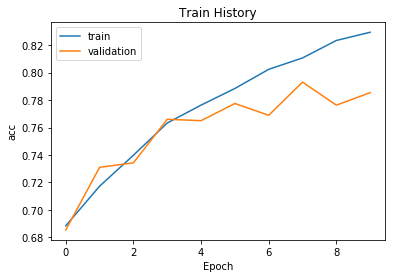

In [57]:
show_train_history(train_history_2,'acc','val_acc')

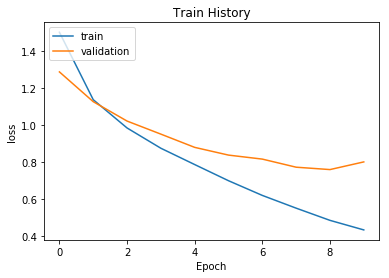

In [58]:
show_train_history(train_history,'loss','val_loss')

In [59]:
scores2 = model_2.evaluate(x_img_test_normalize,
                       y_label_test_OneGot,verbose=0)

In [60]:
scores2[1]

0.7815

In [61]:
prediction2=model_2.predict_classes(x_img_test_normalize)

In [62]:
Predicted_Probability2=model_2.predict(x_img_test_normalize)

lable: cat predict cat


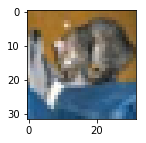

airplane Probability:0.000075114
automobile Probability:0.000425920
bird Probability:0.000232925
cat Probability:0.866174638
deer Probability:0.000037874
dog Probability:0.128714710
frog Probability:0.001521510
horse Probability:0.000080306
ship Probability:0.002629254
truck Probability:0.000107763


In [63]:
show_Predicted_Probability(y_label_test,prediction2,
                          x_img_test,Predicted_Probability2,0)

lable: airplane predict airplane


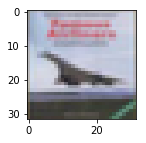

airplane Probability:0.917879701
automobile Probability:0.004000374
bird Probability:0.010389598
cat Probability:0.001793834
deer Probability:0.000463038
dog Probability:0.000038027
frog Probability:0.000113003
horse Probability:0.000082971
ship Probability:0.065057971
truck Probability:0.000181365


In [64]:
show_Predicted_Probability(y_label_test,prediction2,
                          x_img_test,Predicted_Probability2,3)

In [65]:
print(label_dict)
pd.crosstab(y_label_test.reshape(-1),prediction2,rownames=['label'],colnames=['predict'])

{0: 'airplane', 1: 'automobile', 2: 'bird', 3: 'cat', 4: 'deer', 5: 'dog', 6: 'frog', 7: 'horse', 8: 'ship', 9: 'truck'}


predict,0,1,2,3,4,5,6,7,8,9
label,,,,,,,,,,
0,795,17,34,11,25,5,7,12,73,21
1,4,927,1,4,5,4,2,4,7,42
2,65,4,681,29,100,35,45,24,12,5
3,20,7,65,577,84,119,65,45,7,11
4,13,1,44,35,828,17,16,42,4,0
5,8,4,37,141,54,666,26,53,5,6
6,7,0,43,33,48,16,831,12,7,3
7,11,4,23,24,66,31,3,830,1,7
8,41,29,12,9,16,2,6,3,855,27


In [66]:
# model_2.save_weight("SaveModel/cifarCnnModel_2.h5")
# print("Save model to disk")

In [67]:
# try:
#     model_2.load_weights("SaveModel/cifarCnnModel_2.h5")
#     print("加载模型成功！继续训练模型")
# except:
#     print("加载模型失败！开始训练一个新模型")